# Mask Pattern Visualization

This notebook visualizes all the mask patterns implemented in `py/mask_pattern.py`.

In [38]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'py'))

import numpy as np
import matplotlib.pyplot as plt
from mask_pattern import *

# Set random seed for reproducible results
np.random.seed(42)
import random
random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Define visualization parameters
ndivx, ndivy = 2048, 2048  # Grid size for visualization

# Create instances of all mask patterns
patterns = {
    'HBF (Horizontal Bright Field)': LinePattern(cd=56, gap=80, direction="H", field_type="BF"),
    'VBF (Vertical Bright Field)': LinePattern(cd=56, gap=80, direction="V", field_type="BF"),
    'LSBF (Line Space Bright Field)': LSBFPattern(cd=25, fac=0.5, fac1d=1.0),
    'HDF (Horizontal Dark Field)': LinePattern(cd=56, gap=80, direction="H", field_type="DF"),
    'VDF (Vertical Dark Field)': LinePattern(cd=56, gap=80, direction="V", field_type="DF"),
    'LSDF (Line Space Dark Field)': LSDFPattern(cd=25, fac=0.5, fac1d=1.0),
}

print(f"Grid size: {ndivx} x {ndivy}")
print(f"Available patterns: {list(patterns.keys())}")

Grid size: 2048 x 2048
Available patterns: ['HBF (Horizontal Bright Field)', 'VBF (Vertical Bright Field)', 'LSBF (Line Space Bright Field)', 'HDF (Horizontal Dark Field)', 'VDF (Vertical Dark Field)', 'LSDF (Line Space Dark Field)']


HBF (Horizontal Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.645

VBF (Vertical Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.643

LSBF (Line Space Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.424

HDF (Horizontal Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.361

VDF (Vertical Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.350

LSDF (Line Space Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.550



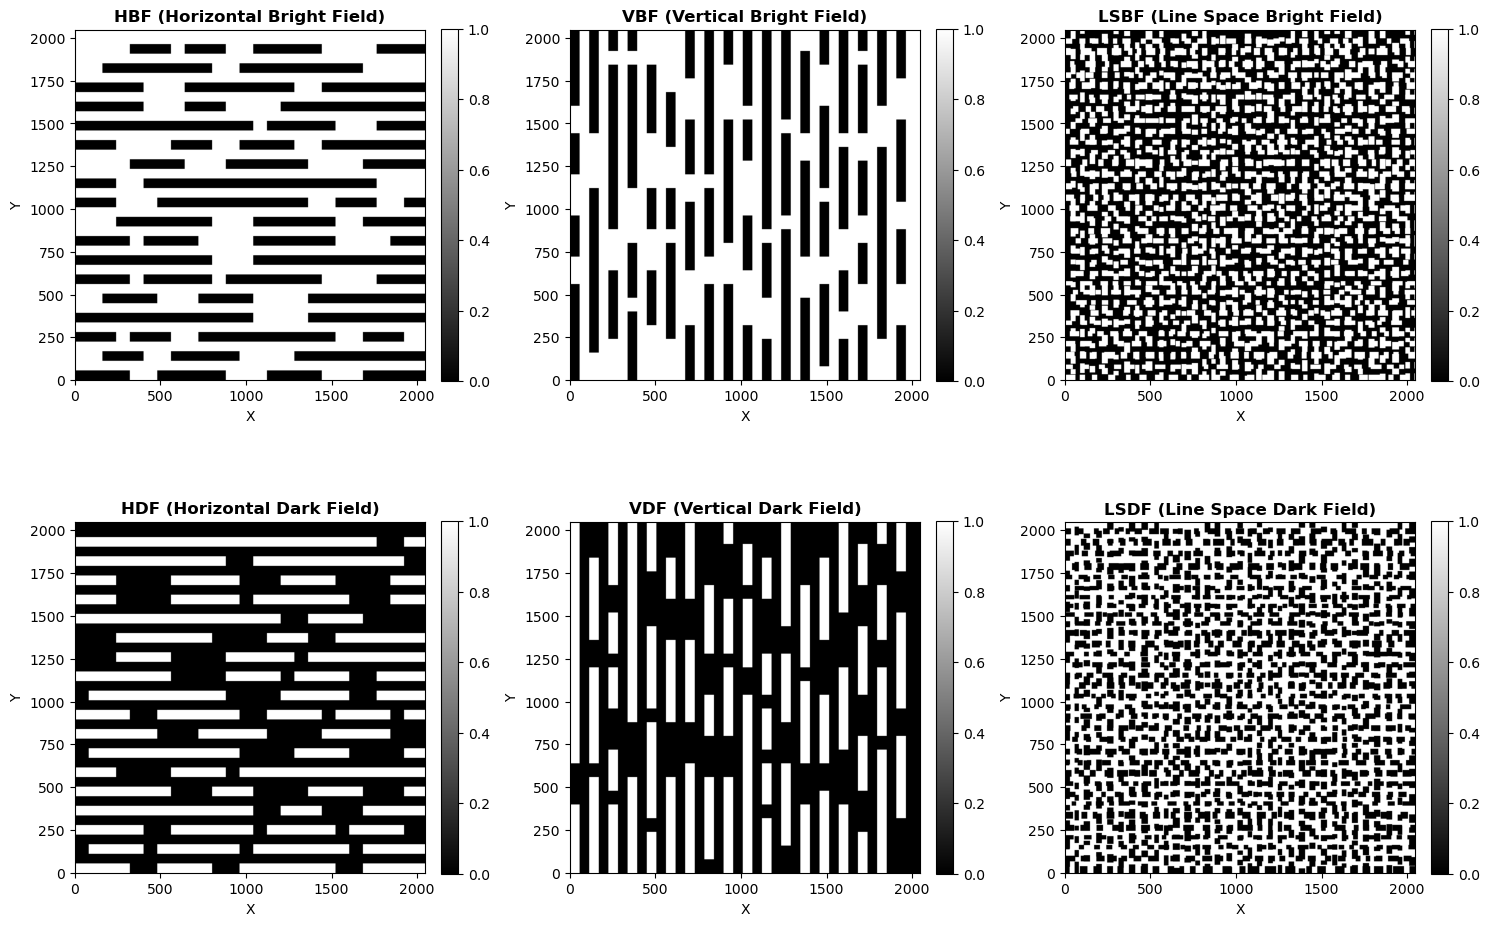

In [44]:
# Generate and visualize all patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, pattern) in enumerate(patterns.items()):
    # Generate mask pattern
    mask = pattern.maskgen(ndivx, ndivy)

    # Plot the mask
    im = axes[i].imshow(mask, cmap='gray', origin='lower')
    axes[i].set_title(name, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    
    # Add colorbar
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    # Print statistics
    print(f"{name}:")
    print(f"  Shape: {mask.shape}")
    print(f"  Unique values: {np.unique(mask)}")
    print(f"  Fill ratio (1s): {np.mean(mask):.3f}")
    print()

plt.tight_layout()
plt.show()

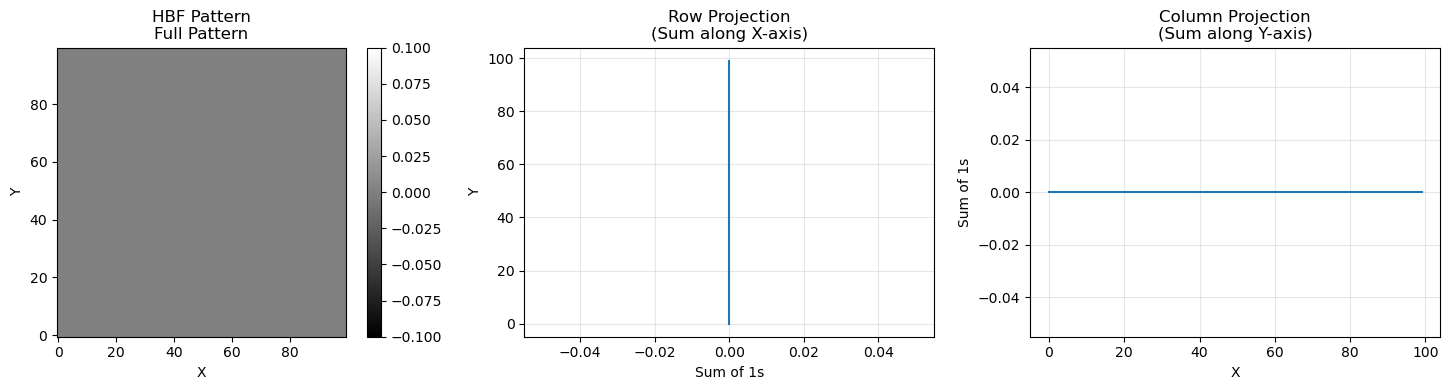


Detailed statistics for HBF Pattern:
  Shape: (100, 100)
  Total pixels: 10000
  Pixels with value 1: 0
  Pixels with value 0: 10000
  Fill ratio: 0.0000
  Min value: 0
  Max value: 0
  Standard deviation: 0.0000


In [ ]:
# Detailed visualization of individual patterns
def visualize_pattern_detailed(pattern_name, pattern_instance, ndivx=100, ndivy=100):
    """Visualize a single pattern in detail with statistics"""
    
    # Generate mask
    mask = pattern_instance.maskgen(ndivx, ndivy)
    
    # Create subplot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Main mask visualization
    im1 = ax1.imshow(mask, cmap='gray', origin='lower')
    ax1.set_title(f'{pattern_name}\nFull Pattern')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    plt.colorbar(im1, ax=ax1)
    
    # Row projection (sum along X-axis)
    row_projection = np.sum(mask, axis=1)
    ax2.plot(row_projection, range(len(row_projection)))
    ax2.set_title('Row Projection\n(Sum along X-axis)')
    ax2.set_xlabel('Sum of 1s')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    
    # Column projection (sum along Y-axis)
    col_projection = np.sum(mask, axis=0)
    ax3.plot(col_projection)
    ax3.set_title('Column Projection\n(Sum along Y-axis)')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Sum of 1s')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\nDetailed statistics for {pattern_name}:")
    print(f"  Shape: {mask.shape}")
    print(f"  Total pixels: {mask.size}")
    print(f"  Pixels with value 1: {np.sum(mask)}")
    print(f"  Pixels with value 0: {mask.size - np.sum(mask)}")
    print(f"  Fill ratio: {np.mean(mask):.4f}")
    print(f"  Min value: {np.min(mask)}")
    print(f"  Max value: {np.max(mask)}")
    print(f"  Standard deviation: {np.std(mask):.4f}")

# Example: Visualize HBF pattern in detail
visualize_pattern_detailed('HBF Pattern', patterns['HBF (Horizontal Bright Field)'])

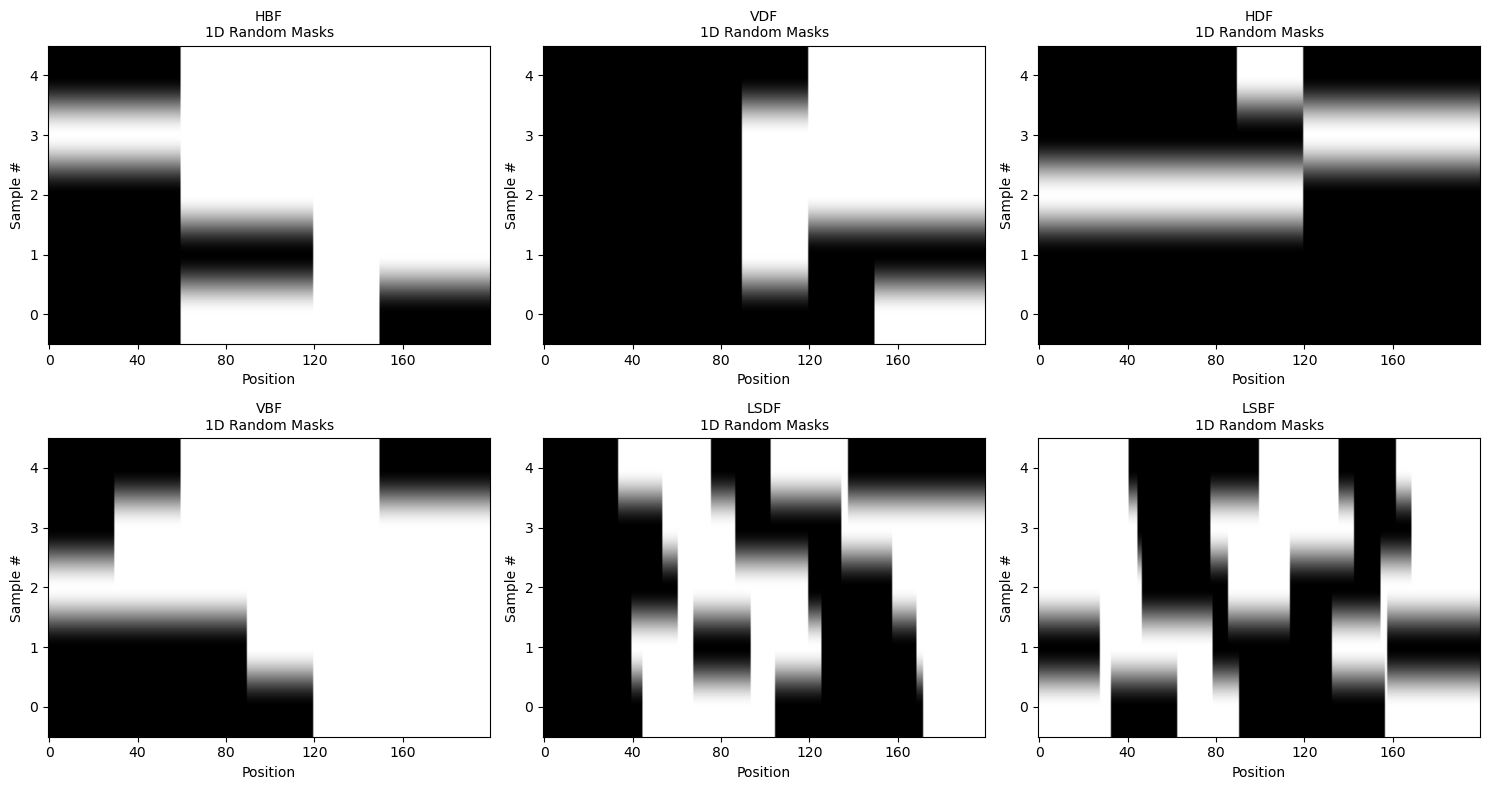

In [ ]:
# Visualize random mask generation (1D masks)
def visualize_1d_masks():
    """Visualize 1D random mask generation for each pattern"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    ndiv = 200  # Length of 1D mask
    
    for i, (name, pattern) in enumerate(patterns.items()):
        # Generate multiple 1D masks to show variation
        masks_1d = []
        for j in range(5):
            if hasattr(pattern, 'randmask'):
                mask_1d = pattern.randmask(ndiv)
                masks_1d.append(mask_1d)
        
        if masks_1d:
            # Stack masks for visualization
            masks_stack = np.vstack(masks_1d)
            
            im = axes[i].imshow(masks_stack, cmap='gray', aspect='auto', origin='lower')
            axes[i].set_title(f'{name.split(" ")[0]}\n1D Random Masks', fontsize=10)
            axes[i].set_xlabel('Position')
            axes[i].set_ylabel('Sample #')
            
            # Show only every 10th tick for cleaner display
            axes[i].set_xticks(range(0, ndiv, 40))
    
    plt.tight_layout()
    plt.show()

visualize_1d_masks()

HBF: cd=10, gap=20: Fill ratio = 0.351
HBF: cd=20, gap=30: Fill ratio = 0.520
HBF: cd=30, gap=40: Fill ratio = 0.240


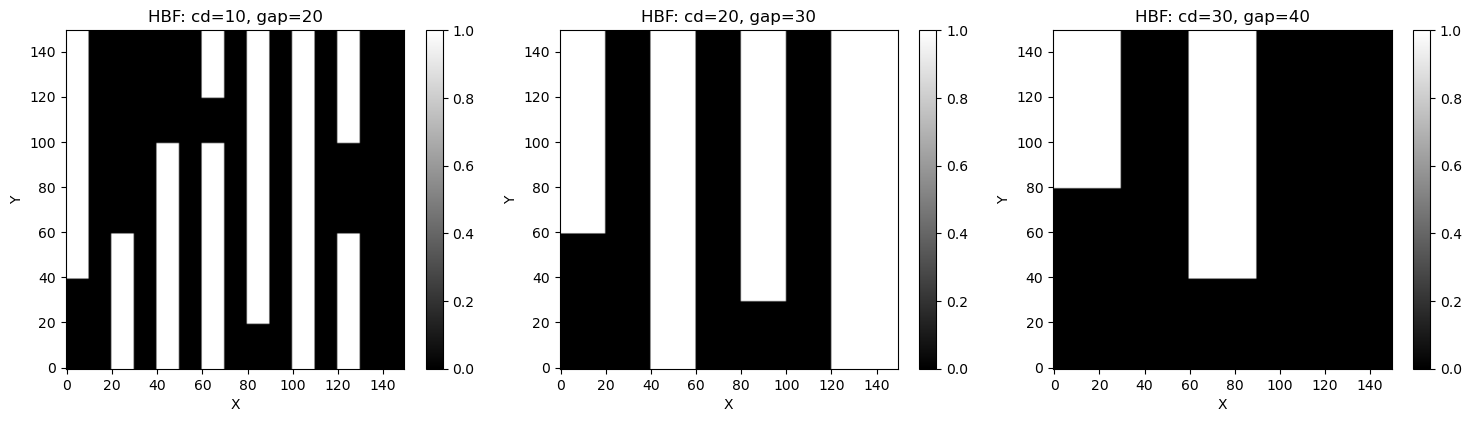

In [ ]:
# Compare patterns with different parameters
def compare_parameters():
    """Compare the same pattern type with different parameters"""
    
    # Example: Compare HBF patterns with different cd and gap values
    hbf_configs = [
        {'cd': 10, 'gap': 20, 'title': 'HBF: cd=10, gap=20'},
        {'cd': 20, 'gap': 30, 'title': 'HBF: cd=20, gap=30'},
        {'cd': 30, 'gap': 40, 'title': 'HBF: cd=30, gap=40'}
    ]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, config in enumerate(hbf_configs):
        pattern = HBFPattern(cd=config['cd'], gap=config['gap'])
        mask = pattern.maskgen(150, 150)
        
        im = axes[i].imshow(mask, cmap='gray', origin='lower')
        axes[i].set_title(config['title'])
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        plt.colorbar(im, ax=axes[i])
        
        print(f"{config['title']}: Fill ratio = {np.mean(mask):.3f}")
    
    plt.tight_layout()
    plt.show()

compare_parameters()

Testing factory function create_mask_pattern():

HBF: Successfully created via factory function
VDF: Successfully created via factory function
HDF: Successfully created via factory function
VBF: Successfully created via factory function
LSDF: Successfully created via factory function
LSBF: Successfully created via factory function


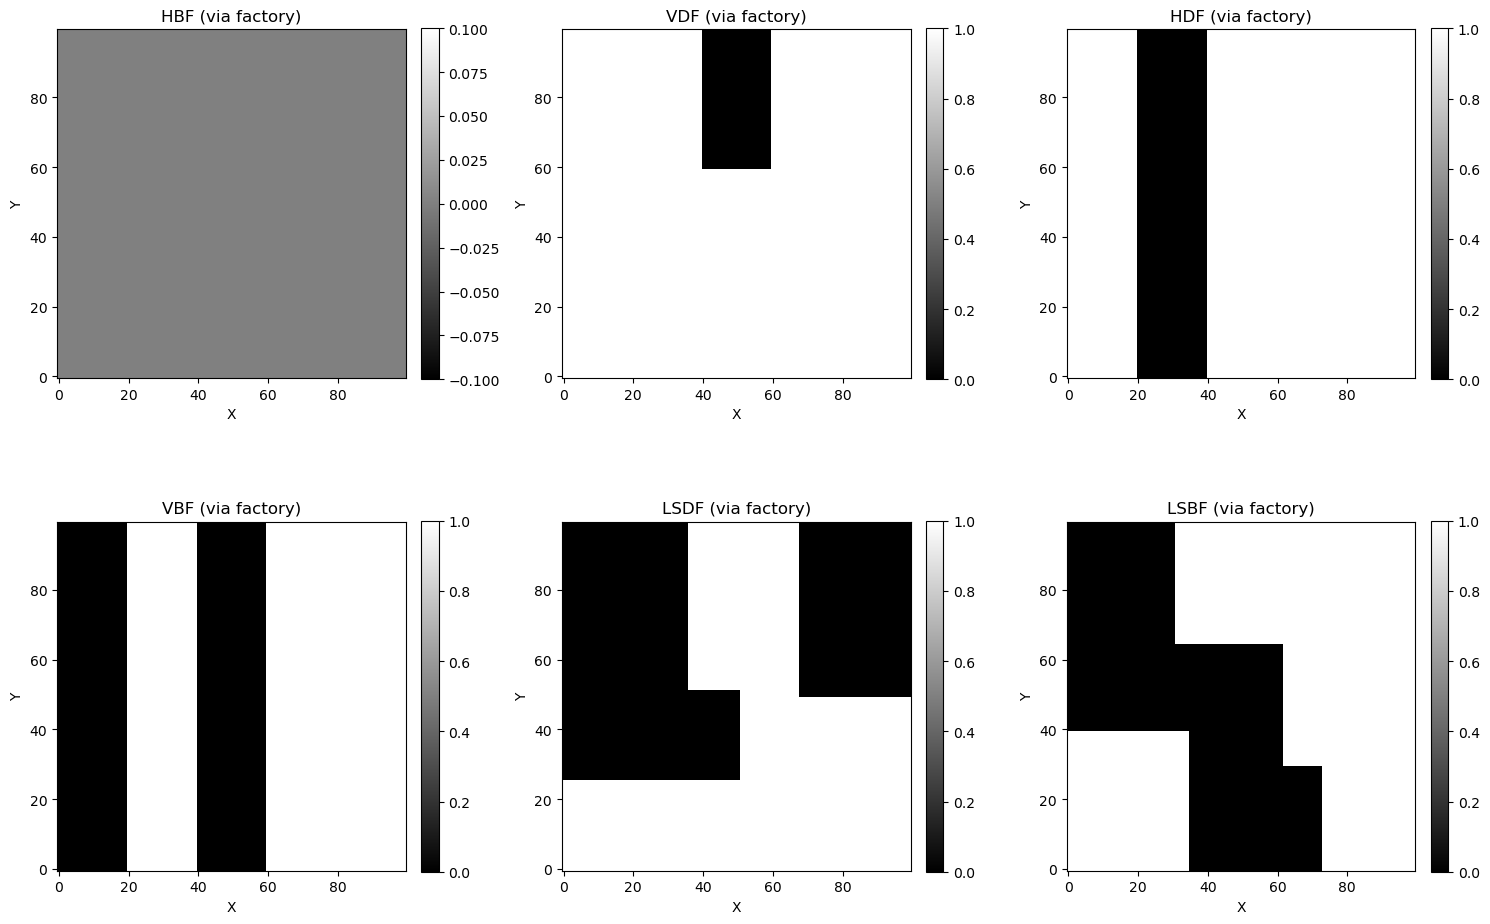

In [ ]:
# Test the factory function
def test_factory_function():
    """Test the create_mask_pattern factory function"""
    
    print("Testing factory function create_mask_pattern():")
    print()
    
    pattern_types = ['HBF', 'VDF', 'HDF', 'VBF', 'LSDF', 'LSBF']
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, pattern_type in enumerate(pattern_types):
        # Create pattern using factory function
        if pattern_type in ['LSDF', 'LSBF']:
            pattern = create_mask_pattern(pattern_type, cd=25, fac=0.5, fac1d=1.0)
        else:
            pattern = create_mask_pattern(pattern_type, cd=20, gap=30)
        
        # Generate mask
        mask = pattern.maskgen(100, 100)
        
        # Visualize
        im = axes[i].imshow(mask, cmap='gray', origin='lower')
        axes[i].set_title(f'{pattern_type} (via factory)', fontsize=12)
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
        
        print(f"{pattern_type}: Successfully created via factory function")
    
    plt.tight_layout()
    plt.show()

test_factory_function()